# Stage 15

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.


Цель: Сравнить Группы А и Группы В. Сделать выводы об их идентичности или нет.

Исходные данные:
1. Таблица hypothesis. Сдержание:
•	Hypothesis — краткое описание гипотезы;
•	Reach — охват пользователей по 10-балльной шкале;
•	Impact — влияние на пользователей по 10-балльной шкале;
•	Confidence — уверенность в гипотезе по 10-балльной шкале;
•	Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

2. Таблица orders. Сдержание:
•	transactionId — идентификатор заказа;
•	visitorId — идентификатор пользователя, совершившего заказ;
•	date — дата, когда был совершён заказ;
•	revenue — выручка заказа;
•	group — группа A/B-теста, в которую попал заказ.

3. Таблица visitors. Сдержание:
•	date — дата;
•	group — группа A/B-теста;
•	visitors — количество пользователей в указанную дату в указанной группе A/B-теста



In [29]:
# подготовка к работе. Загружаем библиотеки.
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters
import warnings

In [30]:
# загружаем исходные данные
hypothesis = pd.read_csv('C:/Users/MaCSC LLC/datasets/hypothesis.csv')
orders = pd.read_csv('C:/Users/MaCSC LLC/datasets/orders.csv')
visitors = pd.read_csv('C:/Users/MaCSC LLC/datasets/visitors.csv')

# Предобработка данных для анализа

In [31]:
def my_data(data):
    
    print('_______________________________________________________________________')
    print(' ')
    display(data.head())
    print(' ')
    data.info()
    print(' ')
    print('Полных дубликатов: ',data.duplicated().sum())
    print('Пропусков: ',data.isnull().sum())
    print(' ')
   

In [32]:
print(f'Смотрим датафрейм hypothesis ')
my_data(hypothesis)

Смотрим датафрейм hypothesis 
_______________________________________________________________________
 


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
 
Полных дубликатов:  0
Пропусков:  Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64
 


In [33]:
print(f'Смотрим датафрейм orders')
my_data(orders)

Смотрим датафрейм orders
_______________________________________________________________________
 


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
 
Полных дубликатов:  0
Пропусков:  transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
 


In [34]:
print(f'Смотрим датафрейм visitors')
my_data(visitors)

Смотрим датафрейм visitors
_______________________________________________________________________
 


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
 
Полных дубликатов:  0
Пропусков:  date        0
group       0
visitors    0
dtype: int64
 


In [35]:
# поправим тип данных
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Все. Предобратотка завершена. Тип дат поправил, пропусков и явных дубликатов нет

# Часть 1. Приоритизация гипотез

1.1 Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [36]:
# посмотрим названия столбцов
print (hypothesis.columns)

Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts'], dtype='object')


In [37]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis = hypothesis.sort_values(by='ICE', ascending = False)
hypothesis['ICE'] = round((hypothesis['ICE']),2)
hypothesis_ice = hypothesis.copy()
pd.options.display.max_colwidth = 100
display(hypothesis[{'Hypothesis','ICE'}])


C:\Users\MaCSC LLC\AppData\Local\Temp\ipykernel_13684\1117120570.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  display(hypothesis[{'Hypothesis','ICE'}])


,ICE,Hypothesis
8,16.20,"Запустить акцию, дающую скидку на товар в день рождения"
0,13.33,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
7,11.20,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
6,8.00,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве..."
2,7.00,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни..."
1,2.00,"Запустить собственную службу доставки, что сократит срок доставки заказов"
5,1.33,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
3,1.12,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
4,1.00,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


In [38]:
hypothesis['RICE'] = (hypothesis['Reach']  *hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis = hypothesis.sort_values(by='RICE', ascending = False)
hypothesis_rice = hypothesis.copy()
hypothesis_rice.style.bar(subset=['A', 'B'], color='#d65f5f')
display(hypothesis[{'Hypothesis','RICE'}])

C:\Users\MaCSC LLC\AppData\Local\Temp\ipykernel_13684\3321983567.py:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  display(hypothesis[{'Hypothesis','RICE'}])


,RICE,Hypothesis
7,112.0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
2,56.0,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни..."
0,40.0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
6,40.0,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве..."
8,16.2,"Запустить акцию, дающую скидку на товар в день рождения"
3,9.0,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
1,4.0,"Запустить собственную службу доставки, что сократит срок доставки заказов"
5,4.0,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
4,3.0,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


In [39]:
#Если объеденить таблицы, то сравнивать значения будет проще
display(hypothesis[{'Hypothesis','RICE','ICE'}])

C:\Users\MaCSC LLC\AppData\Local\Temp\ipykernel_13684\1469551441.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  display(hypothesis[{'Hypothesis','RICE','ICE'}])


,ICE,RICE,Hypothesis
7,11.20,112.0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
2,7.00,56.0,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни..."
0,13.33,40.0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
6,8.00,40.0,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве..."
8,16.20,16.2,"Запустить акцию, дающую скидку на товар в день рождения"
3,1.12,9.0,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
1,2.00,4.0,"Запустить собственную службу доставки, что сократит срок доставки заказов"
5,1.33,4.0,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
4,1.00,3.0,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


In [40]:
hypothesis_ice = hypothesis_ice.rename(columns={'Hypothesis': 'Hypothesis_ice'})
display(hypothesis_ice[{'Hypothesis_ice','ICE'}].head())

hypothesis_rice = hypothesis_rice.rename(columns={'Hypothesis': 'Hypothesis_rice'})
display(hypothesis_rice[{'Hypothesis_rice','RICE'}].head())

print()
print()
print ('Cравниваем ICE и RICE')
print ('______________________________________________________________________________________________________________ ')

hypothesis_ice['Hypothesis_rice'] = hypothesis_rice['Hypothesis_rice'].to_list() 


display(hypothesis_ice[{'Hypothesis_ice','Hypothesis_rice' }].head())



C:\Users\MaCSC LLC\AppData\Local\Temp\ipykernel_13684\1810523382.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  display(hypothesis_ice[{'Hypothesis_ice','ICE'}].head())


,Hypothesis_ice,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.00


C:\Users\MaCSC LLC\AppData\Local\Temp\ipykernel_13684\1810523382.py:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  display(hypothesis_rice[{'Hypothesis_rice','RICE'}].head())


,Hypothesis_rice,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2




Cравниваем ICE и RICE
______________________________________________________________________________________________________________ 


C:\Users\MaCSC LLC\AppData\Local\Temp\ipykernel_13684\1810523382.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  display(hypothesis_ice[{'Hypothesis_ice','Hypothesis_rice' }].head())


,Hypothesis_rice,Hypothesis_ice
8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок","Запустить акцию, дающую скидку на товар в день рождения"
0,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...","Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
7,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей","Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...","Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве..."
2,"Запустить акцию, дающую скидку на товар в день рождения","Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни..."


Выводы: Результыты разные. Из 5 первых лидеров первой тиблицы, во второй есть только 2. Это гипотеха с номером 6,7 и 8 гипотеза, но в другом порядке. Необъодимо продолжить исследование.

# Часть 2. Анализ A/B-теста

Работаем с данными таблицы orders и visitors. Предобратока была проведена ранее

Проанализируйте A/B-тест:


1.	Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2.	Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3.	Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4.	Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
5.	Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
6.	Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7.	Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8.	Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9.	Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10.	Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
11.	Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12.	Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
13.	Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14.	Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.


2.1 Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

возьмем код из тренажера. Для полного соответствия, переименуем столбцы таблицы orders в соответствии с кодом тренажера. Столбы таблицы visitы переименовывать не надо

In [41]:
# переимевываем столбцы
orders.columns =['orderId', 'userId', 'date', 'revenue', 'group']
print(orders.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   orderId  1197 non-null   int64         
 1   userId   1197 non-null   int64         
 2   date     1197 non-null   datetime64[ns]
 3   revenue  1197 non-null   int64         
 4   group    1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None


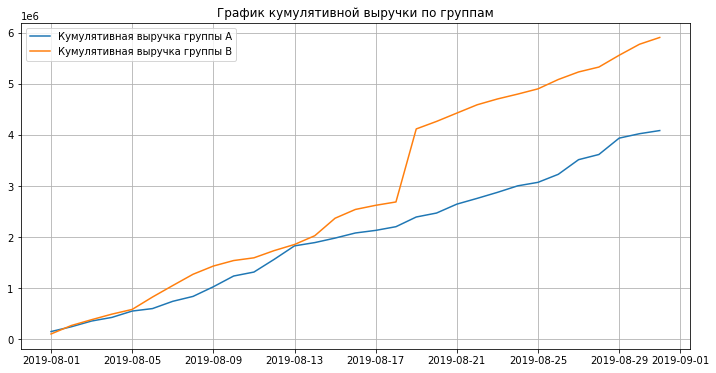

In [42]:
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()


datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'orderId': 'nunique',
            'userId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(12,6))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Кумулятивная выручка группы A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Кумулятивная выручка группы В')
plt.title('График кумулятивной выручки по группам')
plt.grid()
plt.legend()
plt.show()


Выводы: Группа В растет быстрее, но в районе 18-19 авгута возможна какая-то аномалия, и у группы В резко выросла кумулятивная выручка.

2.2	Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

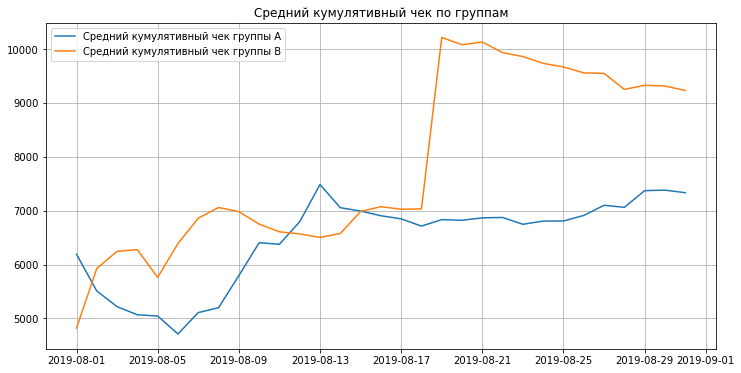

In [43]:
# возьмем код из тренажера ))

# конвертеры, которые позволяют использовать типы pandas в matplotlib 
register_matplotlib_converters()

datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'orderId': 'nunique',
            'userId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]
plt.figure(figsize=(12,6))
plt.grid()
plt.title('Средний кумулятивный чек по группам')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='Cредний кумулятивный чек группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='Cредний кумулятивный чек группы B')
plt.legend() 
plt.show()

Вывод: Здесь также виден аномальный скачек среднего кумулятивного чека группы В в районе 18-20 августа. 

2.3	Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

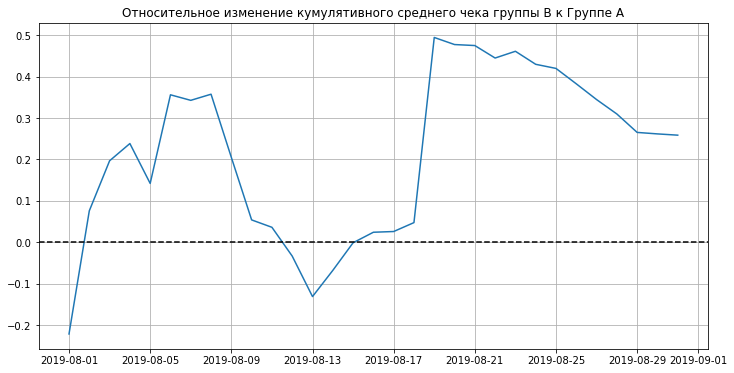

In [44]:
# конвертеры, которые позволяют использовать типы pandas в matplotlib  

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/ \
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительное изменение кумулятивного среднего чека группы В к Группе А')
plt.axhline(y=0, color='black', linestyle='--') ;

plt.show()

Выводы: Средний кумулятивный чек группы В растет быстрее, за исключением 1 и 13 августа. После 20 августа, чек Группы В начинает постеменное снижение к Группе А. Однако на графике отчетвило видно, что средний кумялятивный чек Группы В явно выигрывает кумулятивному чеку группы А

2.4 Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

Итак, продолжаем блуждания в дебрях аналитики

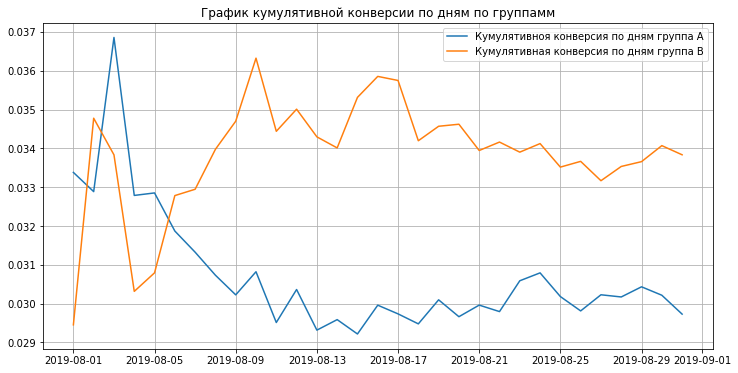

In [45]:
register_matplotlib_converters()

datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'orderId': 'nunique',
            'userId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(12,6))
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='Кумулятивноя конверсия по дням группа A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='Кумулятивная конверсия по дням группа B')
plt.title('График кумулятивной конверсии по дням по группамм')
plt.grid()
plt.legend() 
plt.show()
# задаем масштаб осей
#plt.axis([dt.datetime(2019, 3, 10), dt.datetime(2019, 4, 23), 0, 0.05]) - это из тренажера

Вывод: Не считая первых 6 дней августа, конверсия группы В лучше чем у группы А. Причем после 10 августа, конверсия группы В немного снижается, а вот конверсия группа А хоть и ниже, но стабильна.  

2.5 Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

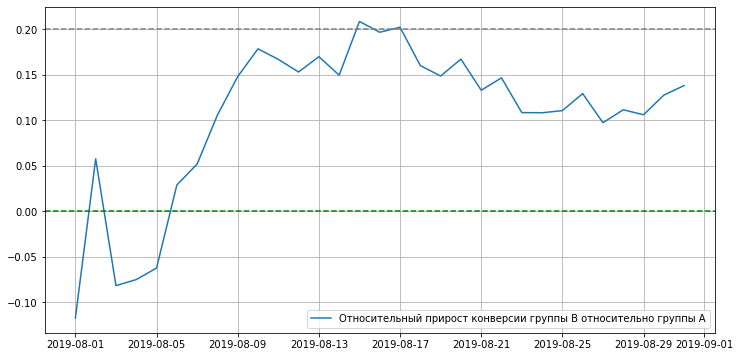

In [46]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'orderId': 'nunique',
            'userId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12,6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='green', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.grid()
plt.show()



Выводы. Тут такжи виден резкий рост конверсии группы В в первую неделю августа, и с 6 августа конверсия группы В выше чем у группы А. 15-17 августа, прирост конверсии группы В был самый большой (это был пик), а дальше началось небольное и плавное снижение

6.1 Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


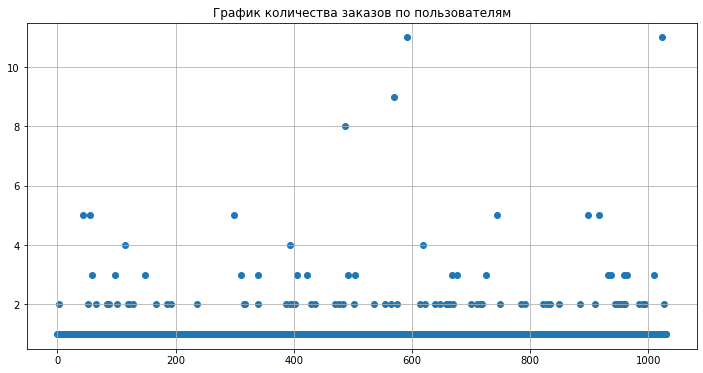

In [47]:
ordersByUsers = (
    orders.groupby('userId', as_index=False)
    .agg({'orderId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))
plt.figure(figsize=(12,6))
plt.grid()
plt.title('График количества заказов по пользователям')
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.show()

Вывод: График неинформативен. Пользователей с заказами больше 2 крайне мало, но явно не видно, выбросы это или нет. Будем считать новым изученным методом перцентелей

2.7 Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [48]:
ordersByUsers = (
    orders.groupby('userId', as_index=False)
    .agg({'orderId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.
print(np.percentile(ordersByUsers['orders'], [95, 99]))
print(np.percentile(ordersByUsers['orders'], [90,91,92,93,94,95,96,97,98,99]))

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5
[2. 4.]
[1. 2. 2. 2. 2. 2. 2. 2. 3. 4.]


Вывод. Пользователей с количество заказов больше 3 менее 2%, а с заказами больше 2 - менее 3%. Границу возьмем 97%, т.к. 97% пользателей сделали не более 2 заказов.

2.8 Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

         orderId      userId       date  revenue group
425    590470918  1920142716 2019-08-19  1294500     B
1196  3936777065  2108080724 2019-08-15   202740     B
858    192721366  1316129916 2019-08-27    93940     A
1136   666610489  1307669133 2019-08-13    92550     A
744   3668308183   888512513 2019-08-27    86620     B
682   1216533772  4266935830 2019-08-29    78990     B
662   1811671147  4266935830 2019-08-29    78990     A
743   3603576309  4133034833 2019-08-09    67990     A
1103  1348774318  1164614297 2019-08-12    66350     A
1099   316924019   148427295 2019-08-12    65710     A


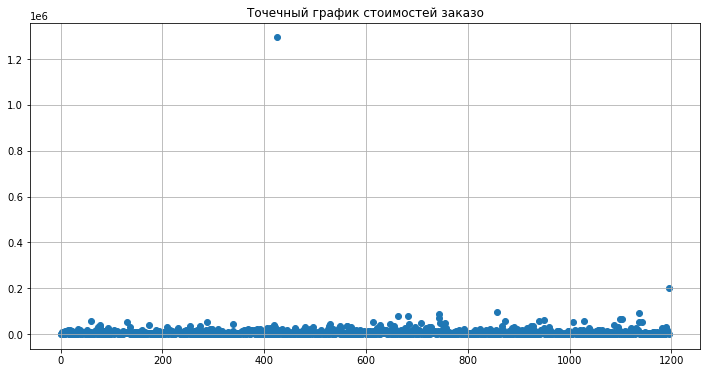

In [49]:
print(orders.sort_values(by='revenue', ascending=False).head(10))
plt.figure(figsize=(12,6))
plt.grid()
plt.title('Точечный график стоимостей заказо')
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

plt.show()

Вывод: большинство заказов не превыщают 100тыс., но заказ под 1.3 млн все портит

      orderId      userId       date  revenue group
0  3667963787  3312258926 2019-08-15     1650     B
1  2804400009  3642806036 2019-08-15      730     B
2  2961555356  4069496402 2019-08-15      400     A
3  3797467345  1196621759 2019-08-15     9759     B
4  2282983706  2322279887 2019-08-15     2308     B


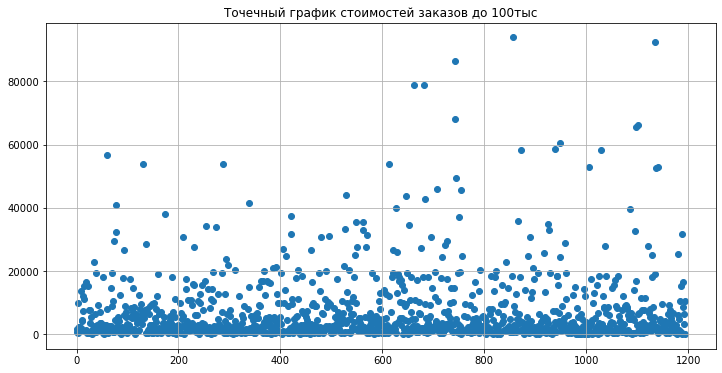

In [50]:
# отсортируем по стоимость до 100 тыс и еще раз построим график
odrers_new_100 = orders[orders['revenue'] <= 100000]
print(odrers_new_100.head())
plt.figure(figsize=(12,6))
plt.grid()
plt.title('Точечный график стоимостей заказов до 100тыс')
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0,len(odrers_new_100['revenue'])))
plt.scatter(x_values, odrers_new_100['revenue'])
plt.show()


Вывод: Вот теперь видно, что заказы находятся в пределах 60тыс, а большинство составляют менее 10тыс.

2.9 Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [51]:
print(orders.head(10))
print(np.percentile(orders['revenue'], [95,99]))
print(np.percentile(orders['revenue'], [94,95,96,97,98,99]))

      orderId      userId       date  revenue group
0  3667963787  3312258926 2019-08-15     1650     B
1  2804400009  3642806036 2019-08-15      730     B
2  2961555356  4069496402 2019-08-15      400     A
3  3797467345  1196621759 2019-08-15     9759     B
4  2282983706  2322279887 2019-08-15     2308     B
5   182168103   935554773 2019-08-15     2210     B
6   398296753  2900797465 2019-08-15     1860     B
7  2626614568    78758296 2019-08-15     1044     A
8  1576988021   295230930 2019-08-15    13710     A
9  1506739906  1882260405 2019-08-15     1855     B
[28000.  58233.2]
[25120.8 28000.  31382.  35485.  44133.2 58233.2]


Выводы: Границу для аномальных заказов лучше взять 95% или стоимостью до 28 тысяч.

2.10 	Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть. Уровень значимости примем 0.05, Альтернативная: различия в среднем между группами есть. Используем тест Манна-Уитни.

In [52]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("alpha =",0.05)
print('p-value =', "{0:.4f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный показатель А и В =',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

alpha = 0.05
p-value = 0.0168
Относительный показатель А и В = 0.138


Вывод: p-value = 0.0168 меньше 0.05. Отвергаем нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет. По «сырым» данным различия в конверсии групп A и B есть. А относительный выигрыш группы "B" над "A" равен 13.8% .

2.11 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

In [53]:
print("alpha =",0.05)
print('p-value=','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный показатель В и А =','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

alpha = 0.05
p-value= 0.729
Относительный показатель В и А = 0.259


P-value больше 0.05. Значит, нет причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия. Хотя разница в среднем цеке между группой В и А на 25,9%

2.12 Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

In [54]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >= 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] >= 3]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: userId, dtype: int64


In [55]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 


print("alpha =",0.05)
print('p-value =','{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный показатель А и В =','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value = 0.01304
Относительный показатель А и В = 0.173


Вывод: p-value меньше 0.05. Ответргаем нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет. По «очищенным» данным различия в конверсии групп есть. Разница группы "B" над "A" равен 17,3%

2.13 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [56]:
print("alpha =",0.05)
print('p-value ='
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительный показатель B и A',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

alpha = 0.05
p-value =0.738
Относительный показатель B и A -0.020


Вывод: P-value больше 0.05. Не отвергаем нулевую гипотезу и считаем, что в среднем чеке нет различий. Средний чек группы B оказался на 2% ниже среднего чека группы A, в то время как по "сырым" данным, он был больше на >17%

2.14 Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

# Заключение

По результатам исследований получены следующие выводы:

1. Конверсии сырых и очищенных данных груп А и В различаются. Конверсия группы  B выше на 17,4% по очищенным и 13.8% по сырым данным по сравнению с группа А.

2. По сырым и очищенным данным различия в средних чеках групп A и B отстутствуют. ( по сырым данным средний чек группы B на 2% ниже среднего чека группы A, а по очищенным, он был больше аж на 25%+). Данна аномалия вызвана сверх дорогим заказом, стоимость более 1,2млн.руб.

Итогг: Конверсия группы В значительно лучше конверсии группы А